In [1]:
from marubatsu import Marubatsu
from ai import ai1s

mb = Marubatsu()
mb.play(ai=[ai1s, ai1s])

UnboundLocalError: cannot access local variable 'ax' where it is not associated with a value

In [2]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
import math

def play(self, ai, ai_dict=None, params=None, verbose=True, seed=None, gui=False, size=3):      
    # ai_dict が None の場合は、空の list で置き換える
    if ai_dict is None:
        ai_dict = {}
    # params が None の場合のデフォルト値を設定する
    if params is None:
        params = [{}, {}]

    # seed が None でない場合は、seed を乱数の種として設定する
    if seed is not None:
        random.seed(seed)
    
    # それぞれの手番の担当を表す Dropdown の項目の値を記録する list を初期化する
    select_values = []
    # ai に代入されている内容を ai_dict に追加する
    for i in range(2):
        # ラベルと項目の値を計算する
        if ai[i] is None:
            label = "人間"
            value = "人間"
        else:
            label = ai[i].__name__        
            value = ai[i]
        # value を select_values に常に登録する
        select_values.append(value)
        # value が ai_values に登録済かどうかを判定する
        if value not in ai_dict.values():
            # 項目を登録する
            ai_dict[label] = value
    
    # 〇 と × の Dropdown を作成する   
    dropdown_circle = widgets.Dropdown(
        options=ai_dict,
        description="〇",
        layout=widgets.Layout(width="100px"),
        style={"description_width": "20px"},
        value=select_values[0],
    )
    dropdown_cross = widgets.Dropdown(
        options=ai_dict,
        description="×",
        layout=widgets.Layout(width="100px"),
        style={"description_width": "20px"},
        value=select_values[1],
    )       
    
    # リセットボタンを作成する
    button = widgets.Button(
        description="リセット",
        layout=widgets.Layout(width="100px"),
    )
    
    # 〇 と × の dropdown と リセットボタンを横に配置した HBox を作成し、表示する
    hbox = widgets.HBox([dropdown_circle, dropdown_cross, button])
    display(hbox)
    
    # リセットボタンのイベントハンドラを定義する
    def on_button_clicked(b):
        self.restart()
        self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui) 
        
    # イベントハンドラをリセットボタンに結びつける
    button.on_click(on_button_clicked)

    # gui が True の場合に、ゲーム盤を描画する画像を作成し、イベントハンドラに結びつける
    if gui:
        fig, ax = plt.subplots(figsize=[size, size])
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False
        fig.canvas.resizable = False          
        
        # ローカル関数としてイベントハンドラを定義する
        def on_mouse_down(event):
            # Axes の上でマウスを押していた場合のみ処理を行う
            if event.inaxes and self.status == Marubatsu.PLAYING:
                x = math.floor(event.xdata)
                y = math.floor(event.ydata)
                self.move(x, y)                
                self.draw_board(ax)

                # 次の手番の処理を行うメソッドを呼び出す
                self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)
                
        # fig の画像にマウスを押した際のイベントハンドラを結び付ける
        fig.canvas.mpl_connect("button_press_event", on_mouse_down)     
    else:
        ax = None

    self.restart()
    return self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)
 
Marubatsu.play = play 

In [3]:
mb.play(ai=[ai1s, ai1s])

Turn o
...
...
...

Turn x
O..
...
...

Turn o
oX.
...
...

Turn x
oxO
...
...

Turn o
oxo
X..
...

Turn x
oxo
xO.
...

Turn o
oxo
xoX
...

winner o
oxo
xox
O..



'o'

In [4]:
def play(self, ai, ai_dict=None, params=None, verbose=True, seed=None, gui=False, size=3):      
    # ai_dict が None の場合は、空の list で置き換える
    if ai_dict is None:
        ai_dict = {}
    # params が None の場合のデフォルト値を設定する
    if params is None:
        params = [{}, {}]

    # seed が None でない場合は、seed を乱数の種として設定する
    if seed is not None:
        random.seed(seed)
    
    # gui が True の場合に、ゲーム盤を描画する画像を作成し、イベントハンドラに結びつける
    if gui:
        # それぞれの手番の担当を表す Dropdown の項目の値を記録する list を初期化する
        select_values = []
        # ai に代入されている内容を ai_dict に追加する
        for i in range(2):
            # ラベルと項目の値を計算する
            if ai[i] is None:
                label = "人間"
                value = "人間"
            else:
                label = ai[i].__name__        
                value = ai[i]
            # value を select_values に常に登録する
            select_values.append(value)
            # value が ai_values に登録済かどうかを判定する
            if value not in ai_dict.values():
                # 項目を登録する
                ai_dict[label] = value
        
        # 〇 と × の Dropdown を作成する   
        dropdown_circle = widgets.Dropdown(
            options=ai_dict,
            description="〇",
            layout=widgets.Layout(width="100px"),
            style={"description_width": "20px"},
            value=select_values[0],
        )
        dropdown_cross = widgets.Dropdown(
            options=ai_dict,
            description="×",
            layout=widgets.Layout(width="100px"),
            style={"description_width": "20px"},
            value=select_values[1],
        )       
        
        # リセットボタンを作成する
        button = widgets.Button(
            description="リセット",
            layout=widgets.Layout(width="100px"),
        )
        
        # 〇 と × の dropdown と リセットボタンを横に配置した HBox を作成し、表示する
        hbox = widgets.HBox([dropdown_circle, dropdown_cross, button])
        display(hbox)
        
        # リセットボタンのイベントハンドラを定義する
        def on_button_clicked(b):
            self.restart()
            self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui) 
            
        # イベントハンドラをリセットボタンに結びつける
        button.on_click(on_button_clicked)

        fig, ax = plt.subplots(figsize=[size, size])
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False
        fig.canvas.resizable = False          
        
        # ローカル関数としてイベントハンドラを定義する
        def on_mouse_down(event):
            # Axes の上でマウスを押していた場合のみ処理を行う
            if event.inaxes and self.status == Marubatsu.PLAYING:
                x = math.floor(event.xdata)
                y = math.floor(event.ydata)
                self.move(x, y)                
                self.draw_board(ax)

                # 次の手番の処理を行うメソッドを呼び出す
                self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)
                
        # fig の画像にマウスを押した際のイベントハンドラを結び付ける
        fig.canvas.mpl_connect("button_press_event", on_mouse_down)     
    else:
        ax = None

    self.restart()
    return self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)
 
Marubatsu.play = play

In [5]:
mb.play(ai=[ai1s, ai1s])

Turn o
...
...
...

Turn x
O..
...
...

Turn o
oX.
...
...

Turn x
oxO
...
...

Turn o
oxo
X..
...

Turn x
oxo
xO.
...

Turn o
oxo
xoX
...

winner o
oxo
xox
O..



'o'

In [6]:
def play(self, ai, ai_dict=None, params=None, verbose=True, seed=None, gui=False, size=3):      
    # ai_dict が None の場合は、空の list で置き換える
    if ai_dict is None:
        ai_dict = {}
    # params が None の場合のデフォルト値を設定する
    if params is None:
        params = [{}, {}]
   
    # seed が None でない場合は、seed を乱数の種として設定する
    if seed is not None:
        random.seed(seed)
  
    # gui が True の場合に、ゲーム盤を描画する画像を作成し、イベントハンドラに結びつける
    if gui:
        # %matplotlib widget のマジックコマンドを実行する
        get_ipython().run_line_magic('matplotlib', 'widget')
        
        # それぞれの手番の担当を表す Dropdown の項目の値を記録する list を初期化する
        select_values = []
        # ai に代入されている内容を ai_dict に追加する
        for i in range(2):
            # ラベルと項目の値を計算する
            if ai[i] is None:
                label = "人間"
                value = "人間"
            else:
                label = ai[i].__name__        
                value = ai[i]
            # value を select_values に常に登録する
            select_values.append(value)
            # value が ai_values に登録済かどうかを判定する
            if value not in ai_dict.values():
                # 項目を登録する
                ai_dict[label] = value
        
        # 〇 と × の Dropdown を作成する   
        dropdown_circle = widgets.Dropdown(
            options=ai_dict,
            description="〇",
            layout=widgets.Layout(width="100px"),
            style={"description_width": "20px"},
            value=select_values[0],
        )
        dropdown_cross = widgets.Dropdown(
            options=ai_dict,
            description="×",
            layout=widgets.Layout(width="100px"),
            style={"description_width": "20px"},
            value=select_values[1],
        )       
        
        # リセットボタンを作成する
        button = widgets.Button(
            description="リセット",
            layout=widgets.Layout(width="100px"),
        )
        
        # 〇 と × の dropdown と リセットボタンを横に配置した HBox を作成し、表示する
        hbox = widgets.HBox([dropdown_circle, dropdown_cross, button])
        display(hbox)
        
        # リセットボタンのイベントハンドラを定義する
        def on_button_clicked(b):
            self.restart()
            self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)
            
        # イベントハンドラをリセットボタンに結びつける
        button.on_click(on_button_clicked)
  
        fig, ax = plt.subplots(figsize=[size, size])
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False
        fig.canvas.resizable = False          
        
        # ローカル関数としてイベントハンドラを定義する
        def on_mouse_down(event):
            # Axes の上でマウスを押していた場合のみ処理を行う
            if event.inaxes and self.status == Marubatsu.PLAYING:
                x = math.floor(event.xdata)
                y = math.floor(event.ydata)
                self.move(x, y)                
                self.draw_board(ax)

                # 次の手番の処理を行うメソッドを呼び出す
                self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)
                
        # fig の画像にマウスを押した際のイベントハンドラを結び付ける
        fig.canvas.mpl_connect("button_press_event", on_mouse_down)     
    else:
        ax = None

    self.restart()
    return self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)

Marubatsu.play = play

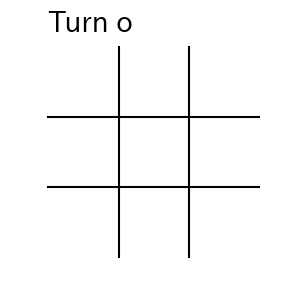

In [7]:
from util import gui_play

gui_play()

In [8]:
def play(self, ai, ai_dict=None, params=None, verbose=True, seed=None, gui=False, size=3):      
    # ai_dict が None の場合は、空の list で置き換える
    if ai_dict is None:
        ai_dict = {}
    # params が None の場合のデフォルト値を設定する
    if params is None:
        params = [{}, {}]
   
    # seed が None でない場合は、seed を乱数の種として設定する
    if seed is not None:
        random.seed(seed)
  
    # gui が True の場合に、ゲーム盤を描画する画像を作成し、イベントハンドラに結びつける
    if gui:
        # %matplotlib widget のマジックコマンドを実行する
        get_ipython().run_line_magic('matplotlib', 'widget')
        
        # それぞれの手番の担当を表す Dropdown の項目の値を記録する list を初期化する
        select_values = []
        # ai に代入されている内容を ai_dict に追加する
        for i in range(2):
            # ラベルと項目の値を計算する
            if ai[i] is None:
                label = "人間"
                value = "人間"
            else:
                label = ai[i].__name__        
                value = ai[i]
            # value を select_values に常に登録する
            select_values.append(value)
            # value が ai_values に登録済かどうかを判定する
            if value not in ai_dict.values():
                # 項目を登録する
                ai_dict[label] = value
        
        # 〇 と × の Dropdown を作成する   
        dropdown_circle = widgets.Dropdown(
            options=ai_dict,
            description="〇",
            layout=widgets.Layout(width="100px"),
            style={"description_width": "20px"},
            value=select_values[0],
        )
        dropdown_cross = widgets.Dropdown(
            options=ai_dict,
            description="×",
            layout=widgets.Layout(width="100px"),
            style={"description_width": "20px"},
            value=select_values[1],
        )       
        
        # リセットボタンを作成する
        button = widgets.Button(
            description="リセット",
            layout=widgets.Layout(width="100px"),
        )
        
        # 〇 と × の dropdown と リセットボタンを横に配置した HBox を作成し、表示する
        hbox = widgets.HBox([dropdown_circle, dropdown_cross, button])
        display(hbox)
        
        # リセットボタンのイベントハンドラを定義する
        def on_button_clicked(b):
            self.restart()
            ai[0] = None if dropdown_circle.value == "人間" else dropdown_circle.value 
            ai[1] = None if dropdown_cross.value == "人間" else dropdown_cross.value 
            self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)
            
        # イベントハンドラをリセットボタンに結びつける
        button.on_click(on_button_clicked)
  
        fig, ax = plt.subplots(figsize=[size, size])
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False
        fig.canvas.resizable = False          
        
        # ローカル関数としてイベントハンドラを定義する
        def on_mouse_down(event):
            # Axes の上でマウスを押していた場合のみ処理を行う
            if event.inaxes and self.status == Marubatsu.PLAYING:
                x = math.floor(event.xdata)
                y = math.floor(event.ydata)
                self.move(x, y)                
                self.draw_board(ax)

                # 次の手番の処理を行うメソッドを呼び出す
                self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)
                
        # fig の画像にマウスを押した際のイベントハンドラを結び付ける
        fig.canvas.mpl_connect("button_press_event", on_mouse_down)    
    else:
        ax=None

    self.restart()
    return self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)

Marubatsu.play = play

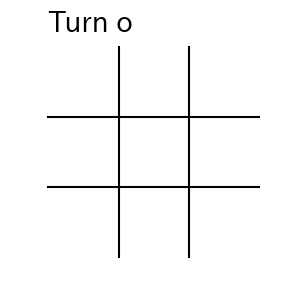

In [9]:
gui_play()

In [10]:
def play(self, ai, ai_dict=None, params=None, verbose=True, seed=None, gui=False, size=3):      
    # ai_dict が None の場合は、空の list で置き換える
    if ai_dict is None:
        ai_dict = {}
    # params が None の場合のデフォルト値を設定する
    if params is None:
        params = [{}, {}]
   
    # seed が None でない場合は、seed を乱数の種として設定する
    if seed is not None:
        random.seed(seed)
  
    # gui が True の場合に、ゲーム盤を描画する画像を作成し、イベントハンドラに結びつける
    if gui:
        # %matplotlib widget のマジックコマンドを実行する
        get_ipython().run_line_magic('matplotlib', 'widget')
        
        # それぞれの手番の担当を表す Dropdown の項目の値を記録する list を初期化する
        select_values = []
        # ai に代入されている内容を ai_dict に追加する
        for i in range(2):
            # ラベルと項目の値を計算する
            if ai[i] is None:
                label = "人間"
                value = "人間"
            else:
                label = ai[i].__name__        
                value = ai[i]
            # value を select_values に常に登録する
            select_values.append(value)
            # value が ai_values に登録済かどうかを判定する
            if value not in ai_dict.values():
                # 項目を登録する
                ai_dict[label] = value
        
        # 〇 と × の Dropdown を作成する   
        dropdown_circle = widgets.Dropdown(
            options=ai_dict,
            description="〇",
            layout=widgets.Layout(width="100px"),
            style={"description_width": "20px"},
            value=select_values[0],
        )
        dropdown_cross = widgets.Dropdown(
            options=ai_dict,
            description="×",
            layout=widgets.Layout(width="100px"),
            style={"description_width": "20px"},
            value=select_values[1],
        )       
        
        # 変更ボタンを作成する
        change_button = widgets.Button(
            description="変更",
            layout=widgets.Layout(width="100px"),
        )
        
        # リセットボタンを作成する
        reset_button = widgets.Button(
            description="リセット",
            layout=widgets.Layout(width="100px"),
        )
        
        # 〇 と × の dropdown と ボタンを横に配置した HBox を作成し、表示する
        hbox = widgets.HBox([dropdown_circle, dropdown_cross, change_button, reset_button])
        display(hbox)
        
        # 変更ボタンのイベントハンドラを定義する
        def on_change_button_clicked(b):
            ai[0] = None if dropdown_circle.value == "人間" else dropdown_circle.value 
            ai[1] = None if dropdown_cross.value == "人間" else dropdown_cross.value 
            self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)

        # リセットボタンのイベントハンドラを定義する
        def on_reset_button_clicked(b):
            self.restart()
            ai[0] = None if dropdown_circle.value == "人間" else dropdown_circle.value 
            ai[1] = None if dropdown_cross.value == "人間" else dropdown_cross.value 
            self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)
            
        # イベントハンドラをボタンに結びつける
        change_button.on_click(on_change_button_clicked)
        reset_button.on_click(on_reset_button_clicked)
  
        fig, ax = plt.subplots(figsize=[size, size])
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False
        fig.canvas.resizable = False          
        
        # ローカル関数としてイベントハンドラを定義する
        def on_mouse_down(event):
            # Axes の上でマウスを押していた場合のみ処理を行う
            if event.inaxes and self.status == Marubatsu.PLAYING:
                x = math.floor(event.xdata)
                y = math.floor(event.ydata)
                self.move(x, y)                
                self.draw_board(ax)

                # 次の手番の処理を行うメソッドを呼び出す
                self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)
                
        # fig の画像にマウスを押した際のイベントハンドラを結び付ける
        fig.canvas.mpl_connect("button_press_event", on_mouse_down)     
    else:
        ax = None

    self.restart()
    return self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)

Marubatsu.play = play

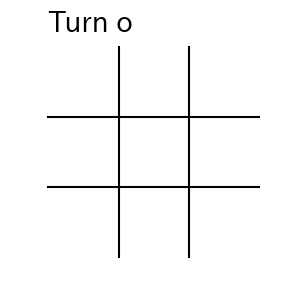

In [11]:
gui_play()

In [12]:
def play(self, ai, ai_dict=None, params=None, verbose=True, seed=None, gui=False, size=3):      
    # ai_dict が None の場合は、空の list で置き換える
    if ai_dict is None:
        ai_dict = {}
    # params が None の場合のデフォルト値を設定する
    if params is None:
        params = [{}, {}]
   
    # seed が None でない場合は、seed を乱数の種として設定する
    if seed is not None:
        random.seed(seed)
  
    # gui が True の場合に、ゲーム盤を描画する画像を作成し、イベントハンドラに結びつける
    if gui:
        # %matplotlib widget のマジックコマンドを実行する
        get_ipython().run_line_magic('matplotlib', 'widget')
        
        # それぞれの手番の担当を表す Dropdown の項目の値を記録する list を初期化する
        select_values = []
        # 〇 と × の Dropdown を格納する list
        dropdown_list = []
        # ai に代入されている内容を ai_dict に追加する
        for i in range(2):
            # ラベルと項目の値を計算する
            if ai[i] is None:
                label = "人間"
                value = "人間"
            else:
                label = ai[i].__name__        
                value = ai[i]
            # value を select_values に常に登録する
            select_values.append(value)
            # value が ai_values に登録済かどうかを判定する
            if value not in ai_dict.values():
                # 項目を登録する
                ai_dict[label] = value
        
            # Dropdown の description を計算する
            description = "〇" if i == 0 else "×"
            dropdown_list.append(
                widgets.Dropdown(
                    options=ai_dict,
                    description=description,
                    layout=widgets.Layout(width="100px"),
                    style={"description_width": "20px"},
                    value=select_values[i],
                )
            )
        
        # 変更ボタンを作成する
        change_button = widgets.Button(
            description="変更",
            layout=widgets.Layout(width="100px"),
        )
        
        # リセットボタンを作成する
        reset_button = widgets.Button(
            description="リセット",
            layout=widgets.Layout(width="100px"),
        )
        
        # 〇 と × の dropdown とボタンを横に配置した HBox を作成し、表示する
        hbox = widgets.HBox([dropdown_list[0], dropdown_list[1], change_button, reset_button])
        display(hbox)
        
        # 変更ボタンのイベントハンドラを定義する
        def on_change_button_clicked(b):
            for i in range(2):
                ai[i] = None if dropdown_list[i].value == "人間" else dropdown_list[i].value
            self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)           

        # リセットボタンのイベントハンドラを定義する
        def on_reset_button_clicked(b):
            self.restart()
            for i in range(2):
                ai[i] = None if dropdown_list[i].value == "人間" else dropdown_list[i].value
            self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)
            
        # イベントハンドラをボタンに結びつける
        change_button.on_click(on_change_button_clicked)
        reset_button.on_click(on_reset_button_clicked)
  
        fig, ax = plt.subplots(figsize=[size, size])
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False
        fig.canvas.resizable = False          
        
        # ローカル関数としてイベントハンドラを定義する
        def on_mouse_down(event):
            # Axes の上でマウスを押していた場合のみ処理を行う
            if event.inaxes and self.status == Marubatsu.PLAYING:
                x = math.floor(event.xdata)
                y = math.floor(event.ydata)
                self.move(x, y)                
                self.draw_board(ax)

                # 次の手番の処理を行うメソッドを呼び出す
                self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)
                
        # fig の画像にマウスを押した際のイベントハンドラを結び付ける
        fig.canvas.mpl_connect("button_press_event", on_mouse_down)     
    else:
        ax = None

    self.restart()
    return self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)

Marubatsu.play = play

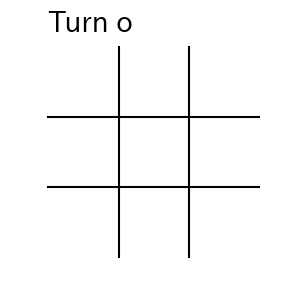

In [13]:
gui_play()

In [14]:
def play(self, ai, ai_dict=None, params=None, verbose=True, seed=None, gui=False, size=3):      
    # ai_dict が None の場合は、空の list で置き換える
    if ai_dict is None:
        ai_dict = {}
    # params が None の場合のデフォルト値を設定する
    if params is None:
        params = [{}, {}]
   
    # seed が None でない場合は、seed を乱数の種として設定する
    if seed is not None:
        random.seed(seed)
  
    # gui が True の場合に、ゲーム盤を描画する画像を作成し、イベントハンドラに結びつける
    if gui:
        # %matplotlib widget のマジックコマンドを実行する
        get_ipython().run_line_magic('matplotlib', 'widget')
        
        # それぞれの手番の担当を表す Dropdown の項目の値を記録する list を初期化する
        select_values = []
        # 〇 と × の Dropdown を格納する list
        dropdown_list = []
        # ai に代入されている内容を ai_dict に追加する
        for i in range(2):
            # ラベルと項目の値を計算する
            if ai[i] is None:
                label = "人間"
                value = "人間"
            else:
                label = ai[i].__name__        
                value = ai[i]
            # value を select_values に常に登録する
            select_values.append(value)
            # value が ai_values に登録済かどうかを判定する
            if value not in ai_dict.values():
                # 項目を登録する
                ai_dict[label] = value
        
            # Dropdown の description を計算する
            description = "〇" if i == 0 else "×"
            dropdown_list.append(
                widgets.Dropdown(
                    options=ai_dict,
                    description=description,
                    layout=widgets.Layout(width="100px"),
                    style={"description_width": "20px"},
                    value=select_values[i],
                )
            )
        
        # 変更ボタンを作成する
        change_button = widgets.Button(
            description="変更",
            layout=widgets.Layout(width="100px"),
        )
        
        # リセットボタンを作成する
        reset_button = widgets.Button(
            description="リセット",
            layout=widgets.Layout(width="100px"),
        )
        
        # 〇 と × の dropdown とボタンを横に配置した HBox を作成し、表示する
        hbox = widgets.HBox([dropdown_list[0], dropdown_list[1], change_button, reset_button])
        display(hbox)
        
        # 変更ボタンのイベントハンドラを定義する
        def on_change_button_clicked(b):
            for i in range(2):
                ai[i] = None if dropdown_list[i].value == "人間" else dropdown_list[i].value
            self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)

        # リセットボタンのイベントハンドラを定義する
        def on_reset_button_clicked(b):
            self.restart()
            on_change_button_clicked(b)
            
        # イベントハンドラをボタンに結びつける
        change_button.on_click(on_change_button_clicked)
        reset_button.on_click(on_reset_button_clicked)
  
        fig, ax = plt.subplots(figsize=[size, size])
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False
        fig.canvas.resizable = False          
        
        # ローカル関数としてイベントハンドラを定義する
        def on_mouse_down(event):
            # Axes の上でマウスを押していた場合のみ処理を行う
            if event.inaxes and self.status == Marubatsu.PLAYING:
                x = math.floor(event.xdata)
                y = math.floor(event.ydata)
                self.move(x, y)                
                self.draw_board(ax)

                # 次の手番の処理を行うメソッドを呼び出す
                self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)
                
        # fig の画像にマウスを押した際のイベントハンドラを結び付ける
        fig.canvas.mpl_connect("button_press_event", on_mouse_down)     
    else:
        ax = None

    self.restart()
    return self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)

Marubatsu.play = play

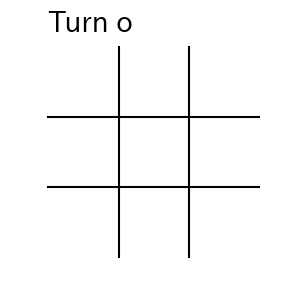

In [15]:
gui_play()

In [16]:
def draw_board(self, ax, ai):
    # Axes の内容をクリアして、これまでの描画内容を削除する
    ax.clear()
    
    # y 軸を反転させる
    ax.invert_yaxis()
    
    # 枠と目盛りを表示しないようにする
    ax.axis("off")   
    
    # 上部のメッセージを描画する
    # 対戦カードの文字列を計算する
    names = []
    for i in range(2):
        names.append("人間" if ai[i] is None else ai[i].__name__)
    ax.text(0, 3.5, f"{names[0]}　VS　{names[1]}", fontsize=20)   
    
    # ゲームの決着がついていない場合は、手番を表示する
    if self.status == Marubatsu.PLAYING:
        text = "Turn " + self.turn
    # 決着がついていれば勝者を表示する
    else:
        text = "winner " + self.status
    ax.text(0, -0.2, text, fontsize=20)
    
    # ゲーム盤の枠を描画する
    for i in range(1, self.BOARD_SIZE):
        ax.plot([0, self.BOARD_SIZE], [i, i], c="k") # 横方向の枠線
        ax.plot([i, i], [0, self.BOARD_SIZE], c="k") # 縦方向の枠線   

    # ゲーム盤のマークを描画する
    for y in range(self.BOARD_SIZE):
        for x in range(self.BOARD_SIZE):
            color = "red" if (x, y) == self.last_move else "black"
            self.draw_mark(ax, x, y, self.board[x][y], color) 
            
Marubatsu.draw_board = draw_board 

In [17]:
def play(self, ai, ai_dict=None, params=None, verbose=True, seed=None, gui=False, size=3):      
    # ai_dict が None の場合は、空の list で置き換える
    if ai_dict is None:
        ai_dict = {}
    # params が None の場合のデフォルト値を設定する
    if params is None:
        params = [{}, {}]
   
    # seed が None でない場合は、seed を乱数の種として設定する
    if seed is not None:
        random.seed(seed)
  
    # gui が True の場合に、ゲーム盤を描画する画像を作成し、イベントハンドラに結びつける
    if gui:
        # %matplotlib widget のマジックコマンドを実行する
        get_ipython().run_line_magic('matplotlib', 'widget')
        
        # それぞれの手番の担当を表す Dropdown の項目の値を記録する list を初期化する
        select_values = []
        # 〇 と × の Dropdown を格納する list
        dropdown_list = []
        # ai に代入されている内容を ai_dict に追加する
        for i in range(2):
            # ラベルと項目の値を計算する
            if ai[i] is None:
                label = "人間"
                value = "人間"
            else:
                label = ai[i].__name__        
                value = ai[i]
            # value を select_values に常に登録する
            select_values.append(value)
            # value が ai_values に登録済かどうかを判定する
            if value not in ai_dict.values():
                # 項目を登録する
                ai_dict[label] = value
        
            # Dropdown の description を計算する
            description = "〇" if i == 0 else "×"
            dropdown_list.append(
                widgets.Dropdown(
                    options=ai_dict,
                    description=description,
                    layout=widgets.Layout(width="100px"),
                    style={"description_width": "20px"},
                    value=select_values[i],
                )
            )
        
        # 変更ボタンを作成する
        change_button = widgets.Button(
            description="変更",
            layout=widgets.Layout(width="100px"),
        )
        
        # リセットボタンを作成する
        reset_button = widgets.Button(
            description="リセット",
            layout=widgets.Layout(width="100px"),
        )
        
        # 〇 と × の dropdown とボタンを横に配置した HBox を作成し、表示する
        hbox = widgets.HBox([dropdown_list[0], dropdown_list[1], change_button, reset_button])
        display(hbox)
        
        # 変更ボタンのイベントハンドラを定義する
        def on_change_button_clicked(b):
            for i in range(2):
                ai[i] = None if dropdown_list[i].value == "人間" else dropdown_list[i].value
            self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)

        # リセットボタンのイベントハンドラを定義する
        def on_reset_button_clicked(b):
            self.restart()
            on_change_button_clicked(b)
            
        # イベントハンドラをボタンに結びつける
        change_button.on_click(on_change_button_clicked)
        reset_button.on_click(on_reset_button_clicked)
  
        fig, ax = plt.subplots(figsize=[size, size])
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False
        fig.canvas.resizable = False          
        
        # ローカル関数としてイベントハンドラを定義する
        def on_mouse_down(event):
            # Axes の上でマウスを押していた場合のみ処理を行う
            if event.inaxes and self.status == Marubatsu.PLAYING:
                x = math.floor(event.xdata)
                y = math.floor(event.ydata)
                self.move(x, y)                
                self.draw_board(ax, ai)

                # 次の手番の処理を行うメソッドを呼び出す
                self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)
                
        # fig の画像にマウスを押した際のイベントハンドラを結び付ける
        fig.canvas.mpl_connect("button_press_event", on_mouse_down)     
    else:
        ax = None

    self.restart()
    return self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)

Marubatsu.play = play

In [18]:
def play_loop(self, ai, ax, params, verbose, gui):   
    # ゲームの決着がついていない間繰り返す
    while self.status == Marubatsu.PLAYING:
        # 現在の手番を表す ai のインデックスを計算する
        index = 0 if self.turn == Marubatsu.CIRCLE else 1
        # ゲーム盤の表示
        if verbose:
            if gui:
                # AI どうしの対戦の場合は画面を描画しない
                if ai[0] is None or ai[1] is None:
                    self.draw_board(ax, ai)
                # 手番を人間が担当する場合は、play メソッドを終了する
                if ai[index] is None:
                    return
            else:
                print(self)
                
        # ai が着手を行うかどうかを判定する
        if ai[index] is not None:
            x, y = ai[index](self, **params[index])
        else:
            # キーボードからの座標の入力
            coord = input("x,y の形式で座標を入力して下さい。exit を入力すると終了します")
            # "exit" が入力されていればメッセージを表示して関数を終了する
            if coord == "exit":
                print("ゲームを終了します")
                return       
            # x 座標と y 座標を要素として持つ list を計算する
            xylist = coord.split(",")
            # xylist の要素の数が 2 ではない場合
            if len(xylist) != 2:
                # エラーメッセージを表示する
                print("x, y の形式ではありません")
                # 残りの while 文のブロックを実行せずに、次の繰り返し処理を行う
                continue
            x, y = xylist
        # (x, y) に着手を行う
        try:
            self.move(int(x), int(y))
        except:
            print("整数の座標を入力して下さい")

    # 決着がついたので、ゲーム盤を表示する
    if verbose:
        if gui:
            self.draw_board(ax, ai)
        else:
            print(self)
            
    return self.status

Marubatsu.play_loop = play_loop

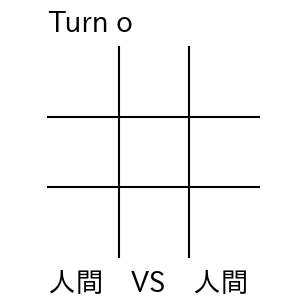

In [19]:
gui_play()

In [20]:
def draw_board(self, ax, ai):
    # Axes の内容をクリアして、これまでの描画内容を削除する
    ax.clear()
    
    # y 軸を反転させる
    ax.invert_yaxis()
    
    # 枠と目盛りを表示しないようにする
    ax.axis("off")   
    
    # ゲームの決着がついていた場合は背景色を変える
    facecolor = "white" if self.status == Marubatsu.PLAYING else "lightyellow"
    ax.figure.set_facecolor(facecolor)
        
    # 上部のメッセージを描画する
    # 対戦カードの文字列を計算する
    names = []
    for i in range(2):
        names.append("人間" if ai[i] is None else ai[i].__name__)
    ax.text(0, 3.5, f"{names[0]}　VS　{names[1]}", fontsize=20)   
    
    # ゲームの決着がついていない場合は、手番を表示する
    if self.status == Marubatsu.PLAYING:
        text = "Turn " + self.turn
    # 決着がついていれば勝者を表示する
    else:
        text = "winner " + self.status
    ax.text(0, -0.2, text, fontsize=20)
    
    # ゲーム盤の枠を描画する
    for i in range(1, self.BOARD_SIZE):
        ax.plot([0, self.BOARD_SIZE], [i, i], c="k") # 横方向の枠線
        ax.plot([i, i], [0, self.BOARD_SIZE], c="k") # 縦方向の枠線   

    # ゲーム盤のマークを描画する
    for y in range(self.BOARD_SIZE):
        for x in range(self.BOARD_SIZE):
            color = "red" if (x, y) == self.last_move else "black"
            self.draw_mark(ax, x, y, self.board[x][y], color) 
            
Marubatsu.draw_board = draw_board 

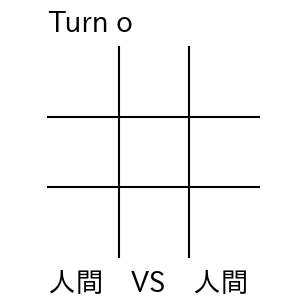

In [21]:
gui_play()

In [22]:
def draw_board(self, ax, ai):
    # Axes の内容をクリアして、これまでの描画内容を削除する
    ax.clear()
    
    # y 軸を反転させる
    ax.invert_yaxis()
    
    # 枠と目盛りを表示しないようにする
    ax.axis("off")   
    
    # ゲームの決着がついていた場合は背景色を
    facecolor = "white" if self.status == Marubatsu.PLAYING else "lightyellow"
    ax.figure.set_facecolor(facecolor)
        
    # 上部のメッセージを描画する
    # 対戦カードの文字列を計算する
    names = []
    for i in range(2):
        names.append("人間" if ai[i] is None else ai[i].__name__)
    ax.text(0, 3.5, f"{names[0]}　VS　{names[1]}", fontsize=20)   
    
    # ゲームの決着がついていない場合は、手番を表示する
    if self.status == Marubatsu.PLAYING:
        text = "Turn " + self.turn
    # 引き分けの場合
    elif self.status == Marubatsu.DRAW:
        text = "Draw game"
    # 決着がついていれば勝者を表示する
    else:
        text = "Winner " + self.status
    ax.text(0, -0.2, text, fontsize=20)
    
    # ゲーム盤の枠を描画する
    for i in range(1, self.BOARD_SIZE):
        ax.plot([0, self.BOARD_SIZE], [i, i], c="k") # 横方向の枠線
        ax.plot([i, i], [0, self.BOARD_SIZE], c="k") # 縦方向の枠線   

    # ゲーム盤のマークを描画する
    for y in range(self.BOARD_SIZE):
        for x in range(self.BOARD_SIZE):
            color = "red" if (x, y) == self.last_move else "black"
            self.draw_mark(ax, x, y, self.board[x][y], color) 
            
Marubatsu.draw_board = draw_board 

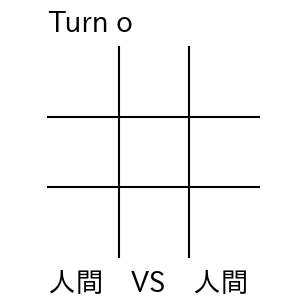

In [23]:
gui_play()

In [24]:
mb.play(ai=[ai1s, ai1s])

Turn o
...
...
...

Turn x
O..
...
...

Turn o
oX.
...
...

Turn x
oxO
...
...

Turn o
oxo
X..
...

Turn x
oxo
xO.
...

Turn o
oxo
xoX
...

winner o
oxo
xox
O..



'o'